In [2]:
import csv

f1 = open('charts.csv',encoding='utf8')
reader = csv.reader(f1)

f = open('Canada.csv', 'w', newline ='')
f.write('')
f.close()

f = open('Canada.csv', 'a', newline ='',encoding='utf8')
writer = csv.writer(f)
n = 0
for row in reader:
    while n == 0:
        writer.writerow(row)
        n += 1
    if "Canada" in row[5]:
        writer.writerow(row)
f.close()

In [1]:
import csv

f1 = open('charts.csv',encoding='utf8')
reader = csv.reader(f1)

f = open('Mexico.csv', 'w', newline ='')
f.write('')
f.close()

f = open('Mexico.csv', 'a', newline ='',encoding='utf8')
writer = csv.writer(f)
n = 0
for row in reader:
    while n == 0:
        writer.writerow(row)
        n += 1
    if "Mexico" in row[5]:
        writer.writerow(row)
f.close()

In [1]:
import csv

f1 = open('charts.csv',encoding='utf8')
reader = csv.reader(f1)

f = open('United_States.csv', 'w', newline ='')
f.write('')
f.close()

f = open('United_States.csv', 'a', newline ='',encoding='utf8')
writer = csv.writer(f)
n = 0
for row in reader:
    while n == 0:
        writer.writerow(row)
        n += 1
    if "United States" in row[5]:
        writer.writerow(row)
f.close()

In [11]:
import pymysql
import mysecrets
import csv

conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = ''' DROP TABLE IF EXISTS `perrince_North America Charts`;'''
cur.execute(sql)

sql = '''CREATE TABLE `perrince_North America Charts` (
`Title` VARCHAR(50) NOT NULL,
`Rank` INT(3) NOT NULL,
`Date` DATETIME NOT NULL,
`Artist` VARCHAR(100) NOT NULL,
`Country` VARCHAR(30) NOT NULL,
`Chart` VARCHAR(10) NOT NULL,
`Number of Streams` INT(8) NOT NULL
) ENGINE=MyISAM DEFAULT CHARSET=latin1 AUTO_INCREMENT=1; '''
cur.execute(sql)

with open('Canada.csv', encoding='utf8') as f:
    data = [{k: str(v) for k, v in row.items()}
        for row in csv.DictReader(f, skipinitialspace=True)]

sql = '''INSERT INTO `perrince_North America Charts` (`Title`, `Rank`, `Date`, `Artist`, `Country`, `Chart`, `Number of Streams`)
VALUES(%s, %s, %s, %s, %s, %s, %s);'''
for row in data:
    tokens = (row['title'], row['rank'], row['date'], row['artist'], "Canada", row['chart'], row['streams'])
    cur.execute(sql,tokens)


In [12]:
import pymysql
import mysecrets
import csv

conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)
   
with open('Mexico.csv', encoding='utf8') as f:
    data1 = [{k: str(v) for k, v in row.items()}
        for row in csv.DictReader(f, skipinitialspace=True)]

sql = '''INSERT INTO `perrince_North America Charts` (`Title`, `Rank`, `Date`, `Artist`, `Country`, `Chart`, `Number of Streams`)
VALUES(%s, %s, %s, %s, %s, %s, %s);'''
for row in data1:
    if 'top200' in row['chart']:
        tokens = (row['title'], row['rank'], row['date'], row['artist'], "Mexico", row['chart'], row['streams'])
        cur.execute(sql,tokens)    

In [13]:
import pymysql
import mysecrets
import csv

conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

with open('United_States.csv', encoding='utf8') as f:
    data2 = [{k: str(v) for k, v in row.items()}
        for row in csv.DictReader(f, skipinitialspace=True)]

sql = '''INSERT INTO `perrince_North America Charts` (`Title`, `Rank`, `Date`, `Artist`, `Country`, `Chart`, `Number of Streams`)
VALUES(%s, %s, %s, %s, %s, %s, %s);'''
for row in data2:
    if 'top200' in row['chart']:
        tokens = (row['title'], row['rank'], row['date'], row['artist'], "United States", row['chart'], row['streams'])
        cur.execute(sql,tokens)

In [21]:
import pymysql
import mysecrets

conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = '''SELECT Distinct(Title) FROM `perrince_North America Charts` 
WHERE `Country` = 'Canada' AND `Rank` = 1 AND `Artist` LIKE "%Drake%"'''
cur.execute(sql)

for row in cur:
    print(row['Title'])

God's Plan
Pain 1993 (with Playboi Carti)
Toosie Slide
Nice For What
Nonstop
In My Feelings
I'm Upset
Money In The Grave (Drake ft. Rick Ross)
Passionfruit
Laugh Now Cry Later (feat. Lil Durk)
What’s Next
Fair Trade (with Travis Scott)
Way 2 Sexy (with Future & Young Thug)


In [33]:
import pymysql
import mysecrets

conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = '''SELECT `Title`,`Artist`,`Date`, `Country`, MAX(`Number of Streams`) 
FROM `perrince_North America Charts` Group BY `Country`;'''
cur.execute(sql)

for row in cur:
    print(f'''{row['Title']} | {row['Artist']} | {row['Country']} | {row['MAX(`Number of Streams`)']}''')

Starboy | The Weeknd, Daft Punk | Canada | 917154
Traicionera | Sebastian Yatra | Mexico | 3680758
Bad and Boujee (feat. Lil Uzi Vert) | Migos | United States | 6146233


Title | Artist | Country | Number of Streams
------ | ------- | -------- | ---------
Starboy | The Weeknd, Daft Punk | Canada | 917154
Traicionera | Sebastian Yatra | Mexico | 3680758
Bad and Boujee (feat. Lil Uzi Vert) | Migos | United States | 6146233

200


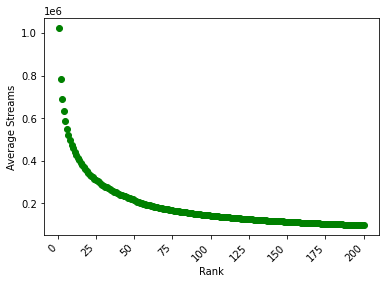

In [2]:
import pymysql
import mysecrets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = '''SELECT `Rank`, AVG(`Number of Streams`)
FROM `perrince_North America Charts`
GROUP BY `RANK`;'''
cur.execute(sql)

l = []
for row in cur:
    d = {}
    d['Rank'] = row['Rank']
    d['Average Streams'] = row['AVG(`Number of Streams`)']
    l.append(d)
    #print(f'''{row['Rank']} | {row['AVG(`Number of Streams`)']}''')
    
print(len(l))
print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.scatter(df['Rank'], df['Average Streams'], color = 'green')
plt.xticks(rotation=45,ha='right')

plt.xlabel("Rank")
plt.ylabel("Average Streams")
#plt.title("Average Streams by Rank")
plt.show()

25


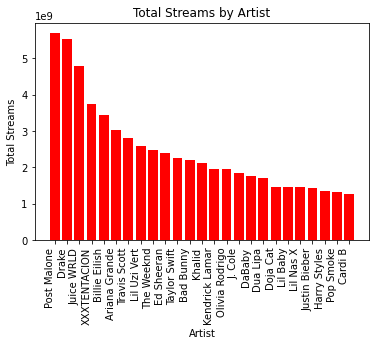

In [13]:
import pymysql
import mysecrets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = '''SELECT DISTINCT (
`Artist`
), SUM(`Number of Streams`)
FROM `perrince_North America Charts`
GROUP BY `Artist`
ORDER BY SUM(`Number of Streams`) DESC;'''
cur.execute(sql)

l = []
n = 0
for row in cur:
    if n < 25:
        d = {}
        d['Artist'] = row['Artist']
        d['Total Streams'] = row['SUM(`Number of Streams`)']
        l.append(d)
        n += 1

        
print(len(l))
#print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.bar(df['Artist'], df['Total Streams'], color = 'red')
plt.xticks(rotation=90,ha='right')

plt.xlabel("Artist")
plt.ylabel("Total Streams")
plt.title("Total Streams by Artist")
plt.show()

25


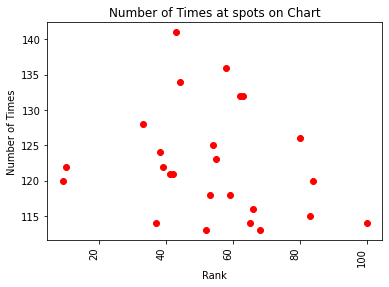

In [1]:
import pymysql
import mysecrets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = '''SELECT DISTINCT (`Rank`), Count(`Rank`) AS 'Number of Times',`Artist`
FROM `perrince_North America Charts`
WHERE `Artist` = 'Juice WRLD'
GROUP BY `Rank`
ORDER BY Count(`Rank`) DESC;'''
cur.execute(sql)

l = []
n = 0
for row in cur:
    if n < 25:
        d = {}
        d['Rank'] = row['Rank']
        d['Number of Times'] = row['Number of Times']
        l.append(d)
        n += 1

        
print(len(l))
#print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.scatter(df['Rank'], df['Number of Times'], color = 'red')
plt.xticks(rotation=90,ha='right')

plt.xlabel("Rank")
plt.ylabel("Number of Times")
plt.title("Number of Times at spots on Chart")
plt.show()

25


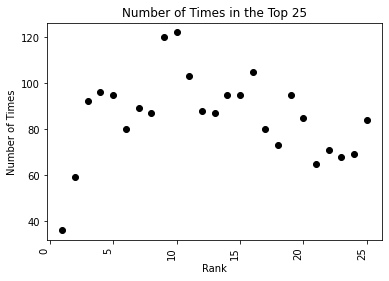

In [8]:
import pymysql
import mysecrets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = '''SELECT DISTINCT (`Rank`), Count(`Rank`) AS 'Number of Times',`Artist`
FROM `perrince_North America Charts`
WHERE `Artist` = 'Juice WRLD'
GROUP BY `Rank`
ORDER BY `Rank` ASC;'''
cur.execute(sql)

l = []
n = 0
for row in cur:
    if n < 25:
        d = {}
        d['Rank'] = row['Rank']
        d['Number of Times'] = row['Number of Times']
        l.append(d)
        n += 1

        
print(len(l))
#print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.scatter(df['Rank'], df['Number of Times'], color = 'black')
plt.xticks(rotation=90,ha='right')

plt.xlabel("Rank")
plt.ylabel("Number of Times")
plt.title("Number of Times Juice WRLD in the Top 25")
plt.show()

25


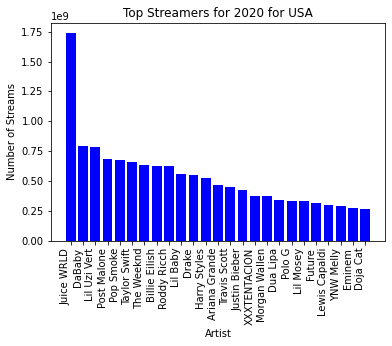

25


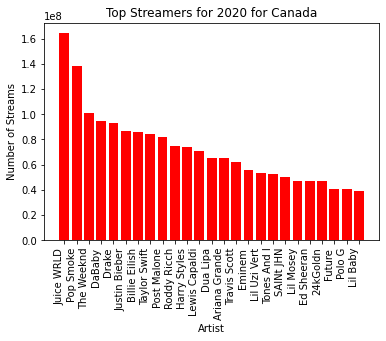

25


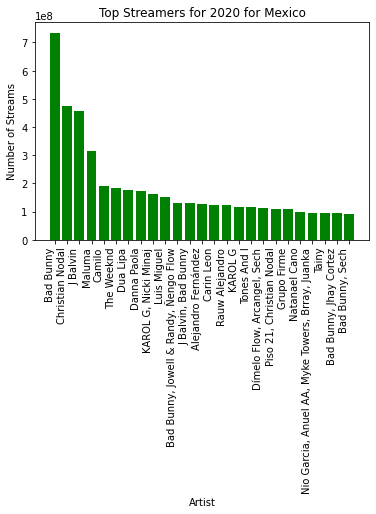

In [1]:
import pymysql
import mysecrets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


conn = pymysql.connect(host=mysecrets.host, port=3306, user=mysecrets.user,
                       passwd=mysecrets.passwd, db='is426', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)

sql = '''SELECT `Artist`, SUM(`Number of Streams`) FROM `perrince_North America Charts` 
WHERE `Date` > '2020-01-01 00:00:00' AND `Date` < '2021-01-01 00:00:00' AND Country = "United States"
GROUP BY `Artist`
ORDER BY SUM(`Number of Streams`) DESC;'''
cur.execute(sql)

l = []
n = 0
for row in cur:
    if n < 25:
        d = {}
        d['Artist'] = row['Artist']
        d['Number of Streams'] = row['SUM(`Number of Streams`)']
        l.append(d)
        n += 1

        
print(len(l))
#print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.bar(df['Artist'], df['Number of Streams'], color = 'blue')
plt.xticks(rotation=90,ha='right')

plt.xlabel("Artist")
plt.ylabel("Number of Streams")
plt.title("Top Streamers for 2020 for USA")
plt.show()


sql = '''SELECT `Artist`, SUM(`Number of Streams`) FROM `perrince_North America Charts` 
WHERE `Date` > '2020-01-01 00:00:00' AND `Date` < '2021-01-01 00:00:00' AND Country = "Canada"
GROUP BY `Artist`
ORDER BY SUM(`Number of Streams`) DESC;'''
cur.execute(sql)

l = []
n = 0
for row in cur:
    if n < 25:
        d = {}
        d['Artist'] = row['Artist']
        d['Number of Streams'] = row['SUM(`Number of Streams`)']
        l.append(d)
        n += 1

        
print(len(l))
#print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.bar(df['Artist'], df['Number of Streams'], color = 'red')
plt.xticks(rotation=90,ha='right')

plt.xlabel("Artist")
plt.ylabel("Number of Streams")
plt.title("Top Streamers for 2020 for Canada")
plt.show()


sql = '''SELECT `Artist`, SUM(`Number of Streams`) FROM `perrince_North America Charts` 
WHERE `Date` > '2020-01-01 00:00:00' AND `Date` < '2021-01-01 00:00:00' AND Country = "Mexico"
GROUP BY `Artist`
ORDER BY SUM(`Number of Streams`) DESC;'''
cur.execute(sql)

l = []
n = 0
for row in cur:
    if n < 25:
        d = {}
        d['Artist'] = row['Artist']
        d['Number of Streams'] = row['SUM(`Number of Streams`)']
        l.append(d)
        n += 1

        
print(len(l))
#print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.bar(df['Artist'], df['Number of Streams'], color = 'green')
plt.xticks(rotation=90,ha='right')

plt.xlabel("Artist")
plt.ylabel("Number of Streams")
plt.title("Top Streamers for 2020 for Mexico")
plt.show()

3


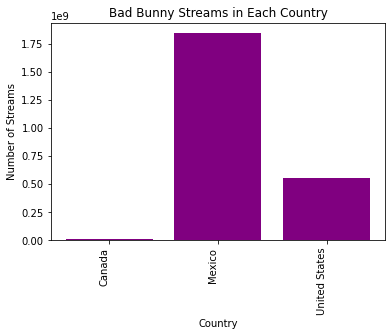

In [2]:
sql = '''SELECT SUM(`Number of Streams`), `Country` FROM `perrince_North America Charts` 
WHERE `Date` > '2020-01-01 00:00:00' AND `Date` < '2021-01-01 00:00:00' AND Artist LIKE "%Bad Bunny%"
GROUP BY `Country`;'''
cur.execute(sql)

l = []
for row in cur:
    d = {}
    d['Country'] = row['Country']
    d['Number of Streams'] = row['SUM(`Number of Streams`)']
    l.append(d)

        
print(len(l))
#print(l)
df = pd.DataFrame(l)

fig = plt.figure()
plt.bar(df['Country'], df['Number of Streams'], color = 'purple')
plt.xticks(rotation=90,ha='right')

plt.xlabel("Country")
plt.ylabel("Number of Streams")
plt.title("Bad Bunny Streams in Each Country")
plt.show()